In [4]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [5]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

In [6]:
NUM_CLASSES = 5

In [7]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [8]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [13]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
20/27 [=====================>........] - ETA: 0s - loss: 1.6443 - accuracy: 0.2102
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5


c:\Users\ELIZABATH GIGI\anaconda3\lib\site-packages\keras\src\engine\training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 3s 44ms/step - loss: 1.6305 - accuracy: 0.2314 - val_loss: 1.5586 - val_accuracy: 0.3569
Epoch 2/1000
27/27 [==============================] - ETA: 0s - loss: 1.5411 - accuracy: 0.3254
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 15ms/step - loss: 1.5411 - accuracy: 0.3254 - val_loss: 1.4934 - val_accuracy: 0.3855
Epoch 3/1000
19/27 [====================>.........] - ETA: 0s - loss: 1.4797 - accuracy: 0.3758
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 12ms/step - loss: 1.4663 - accuracy: 0.3800 - val_loss: 1.4131 - val_accuracy: 0.4204
Epoch 4/1000
18/27 [===================>..........] - ETA: 0s - loss: 1.4081 - accuracy: 0.4136
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
27/27 [==============================] - 0s 13ms/step - loss: 1.3948 - accuracy: 0.4196 - val_

In [15]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

9/9 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9741


In [16]:
model = tf.keras.models.load_model(model_save_path)

In [17]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 137ms/step
[1.6035346e-03 2.4353648e-02 9.7404283e-01 1.6615852e-09 8.8023924e-13]
2


35/35 [==============================] - 0s 4ms/step


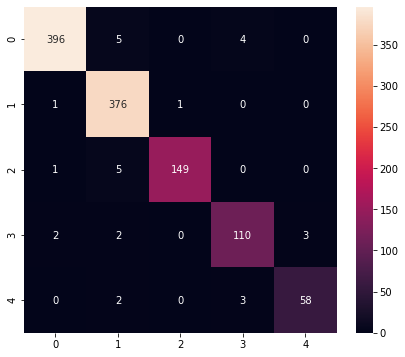

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       405
           1       0.96      0.99      0.98       378
           2       0.99      0.96      0.98       155
           3       0.94      0.94      0.94       117
           4       0.95      0.92      0.94        63

    accuracy                           0.97      1118
   macro avg       0.97      0.96      0.96      1118
weighted avg       0.97      0.97      0.97      1118



In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [19]:
model.save(model_save_path, include_optimizer=False)

c:\Users\ELIZABATH GIGI\anaconda3\lib\site-packages\keras\src\engine\training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [20]:
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ELIZAB~1\AppData\Local\Temp\tmpftvl5_4z\assets


INFO:tensorflow:Assets written to: C:\Users\ELIZAB~1\AppData\Local\Temp\tmpftvl5_4z\assets


6600

In [21]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [22]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [23]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [24]:
%%time
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [25]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.6035321e-03 2.4353623e-02 9.7404283e-01 1.6615820e-09 8.8023593e-13]
2
